<a href="https://colab.research.google.com/github/fboldt/aulasml/blob/master/aula4b_classificador_linear_multiclasse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_wine
dataset = load_wine()
X, y = dataset.data, dataset.target
X.shape, y.shape

((178, 13), (178,))

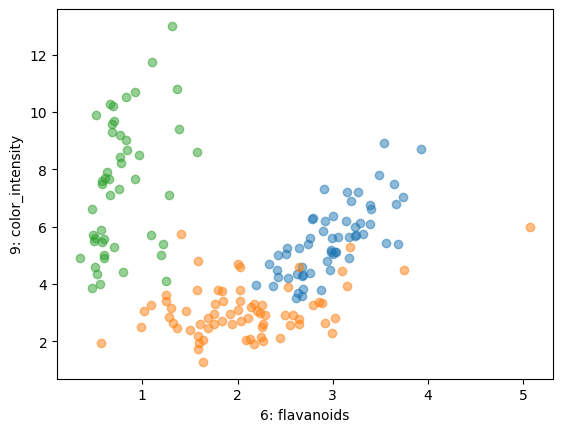

In [2]:
import matplotlib.pyplot as plt
i, j = 6, 9
Xtmp = X[:,[i,j]]
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)
plt.show()

In [3]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin

def addBias(X):
  bias  = np.ones((X.shape[0], 1))
  X_b = np.concatenate((bias, X), axis=1)
  return X_b

class clf_linear(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    X_b = addBias(X)
    self.labels_ = list(set(y))
    self.w = np.random.uniform(size=(X_b.shape[1],len(self.labels_)))
    yhot = np.zeros((len(y),len(self.labels_)))
    for i in range(len(self.labels_)):
      yhot[:,i] = y==self.labels_[i]
    for _ in range(10000):
      ypred = X_b.dot(self.w)
      erros = ypred - yhot
      ajuste = X_b.T @ erros
      lr = 0.0005 / len(y)
      # print(ajuste)
      self.w = self.w - lr * ajuste

  def predict(self, X):
    X_b = addBias(X)
    ypred = X_b.dot(self.w)
    ypred = np.argmax(ypred, axis=1)
    ypred = np.array([self.labels_[i] for i in ypred])
    return ypred

modelo = clf_linear()
modelo.fit(Xtmp, y)
ypred = modelo.predict(Xtmp)
sum(ypred==y)/len(y)

0.9157303370786517

In [4]:
modelo.w

array([[ 0.13875277,  0.34182491,  0.04049164],
       [ 0.17055309,  0.15741706, -0.22266414],
       [-0.0180471 , -0.06609931,  0.12898841]])

In [5]:
intercept = modelo.w[0]
intercept

array([0.13875277, 0.34182491, 0.04049164])

In [6]:
coef = modelo.w[1:]
coef

array([[ 0.17055309,  0.15741706, -0.22266414],
       [-0.0180471 , -0.06609931,  0.12898841]])

In [7]:
def plot_hyperplane(X, coef, intercept, column=0, color='black'):
  def line(x0):
    return (-(x0 * coef[0, column]) - intercept[column]) / coef[1, column]
  xmin = min(X[:,0])
  xmax = max(X[:,0])
  plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="-", color=color)

0.9157303370786517


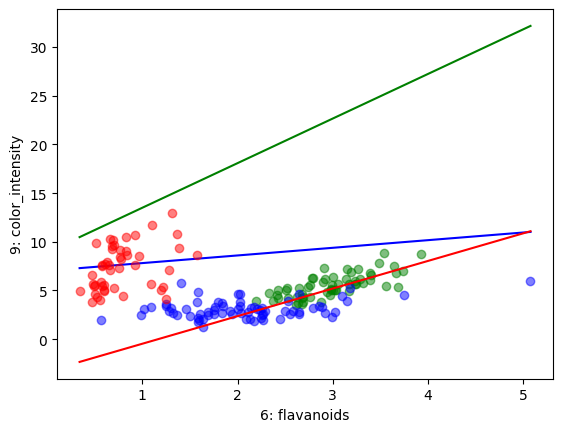

In [8]:
modelo = clf_linear()
modelo.fit(Xtmp, y)
print(sum(modelo.predict(Xtmp)==y)/len(y))
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
colors = ['green', 'blue', 'red']
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5, color=colors[k])
  plot_hyperplane(Xtmp, modelo.w[1:], modelo.w[0], k, colors[k])
plt.show()

In [9]:
from sklearn.linear_model import SGDClassifier

modelo = SGDClassifier()
modelo.fit(Xtmp, y)
ypred = modelo.predict(Xtmp)
sum(ypred==y)/len(y)

0.8426966292134831

In [10]:
modelo.coef_, modelo.intercept_, modelo.classes_

(array([[ 93.83636762,  11.88857425],
        [  9.14594873, -38.67061703],
        [-90.80938802,  23.90875192]]),
 array([-275.8139766 ,  184.56685644,  -23.66744097]),
 array([0, 1, 2]))

0.8539325842696629


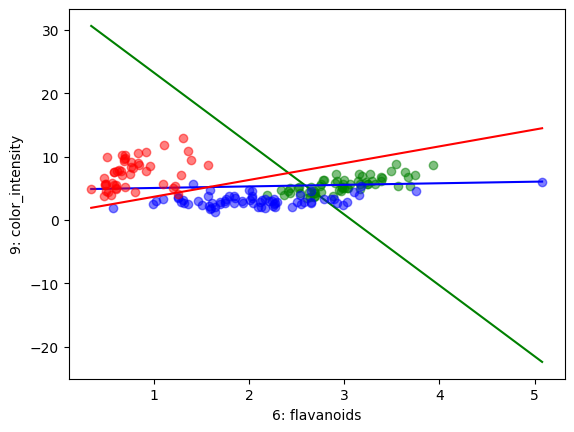

In [11]:
modelo = SGDClassifier()
modelo.fit(Xtmp, y)
print(sum(modelo.predict(Xtmp)==y)/len(y))
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
colors = ['green', 'blue', 'red']
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5, color=colors[k])
  plot_hyperplane(Xtmp, modelo.coef_.T, modelo.intercept_, k, colors[k])
plt.show()

0.651685393258427


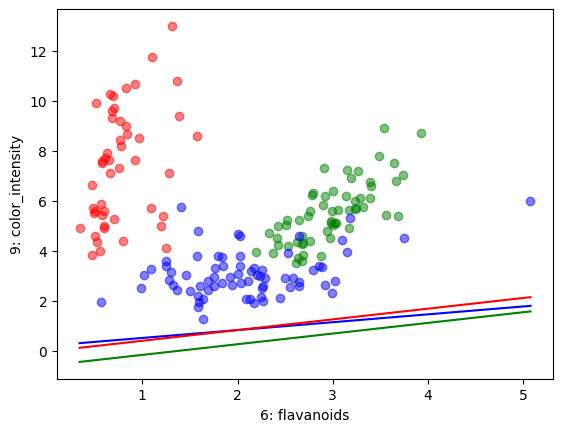

In [12]:
from sklearn.linear_model import SGDClassifier
modelo = SGDClassifier()
modelo.fit(X, y)
print(sum(modelo.predict(X)==y)/len(y))
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
colors = ['green', 'blue', 'red']
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5, color=colors[k])
  plot_hyperplane(Xtmp, modelo.coef_.T[[i,j],:], modelo.intercept_, k, colors[k])
plt.show()

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

modelo = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SGDClassifier())
])
modelo.fit(X, y)
print(sum(modelo.predict(X)==y)/len(y))

1.0


In [14]:
Xnorm = StandardScaler().fit_transform(X)
modelo.fit(Xnorm, y)
print(sum(modelo.predict(Xnorm)==y)/len(y))

1.0


1.0


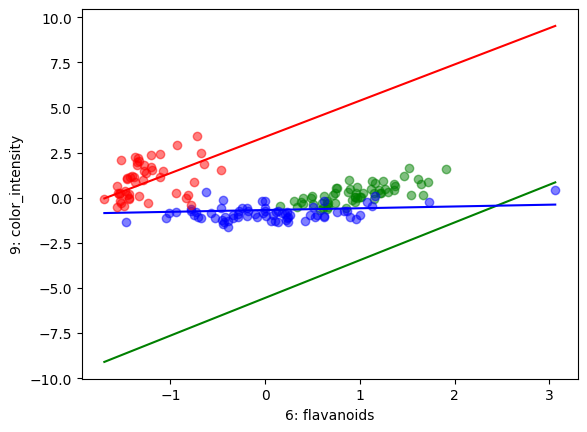

In [15]:
modelo = SGDClassifier()
modelo.fit(Xnorm, y)
print(sum(modelo.predict(Xnorm)==y)/len(y))
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
colors = ['green', 'blue', 'red']
for k in set(y):
  plt.plot(Xnorm[:,i][y==k], Xnorm[:,j][y==k], "o", alpha=0.5, color=colors[k])
  plot_hyperplane(Xnorm[:,[i,j]], modelo.coef_.T[[i,j],:], modelo.intercept_, k, colors[k])
plt.show()

0.9943820224719101


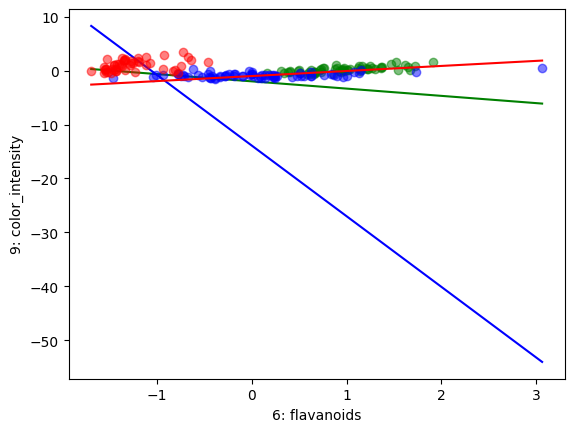

In [16]:
modelo = clf_linear()
modelo.fit(Xnorm, y)
print(sum(modelo.predict(Xnorm)==y)/len(y))
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
colors = ['green', 'blue', 'red']
for k in set(y):
  plt.plot(Xnorm[:,i][y==k], Xnorm[:,j][y==k], "o", alpha=0.5, color=colors[k])
  plot_hyperplane(Xnorm[:,[i,j]], modelo.w[[i+1,j+1],:], modelo.w[0], k, colors[k])
plt.show()

In [17]:
from sklearn.model_selection import cross_validate
modelo = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', clf_linear())
])
test_score = cross_validate(modelo, X, y)['test_score']
np.mean(test_score), test_score

(0.9441269841269841,
 array([0.86111111, 0.97222222, 0.94444444, 0.97142857, 0.97142857]))

In [18]:
modelo = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SGDClassifier())
])
test_score = cross_validate(modelo, X, y)['test_score']
np.mean(test_score), test_score

(0.9774603174603176,
 array([0.97222222, 0.97222222, 1.        , 0.97142857, 0.97142857]))